# Exploratory Data Analysis (EDA )

Aims: 
* Get a notion about a distribution of dataset.
* Dataset was analyzed in token level.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 

In [2]:
df_bioasq7b = pd.read_csv("./bioasq7b_eda.data")

In [3]:
df_bioasq7b.describe()

,question_len,num_word_in_question,answer_len,num_word_in_answer,num_word_in_token
count,40888.000000,40888.000000,40888.000000,40888.000000,40888.000000
mean,64.147794,15.866391,11.172153,4.415476,107.352328
std,23.658124,6.237572,11.457345,3.184359,100.685599
min,13.000000,4.000000,1.000000,1.000000,1.000000
25%,48.000000,12.000000,4.000000,3.000000,27.000000
50%,61.000000,15.000000,8.000000,4.000000,66.000000
75%,77.000000,19.000000,15.000000,5.000000,178.000000
max,189.000000,54.000000,282.000000,82.000000,1500.000000


In [4]:
df_bioasq7b.head(2)

,id,question_len,num_word_in_question,answer_len,num_word_in_answer,num_word_in_token
0,56bc751eac7ad10019000013_001,46,14,14,5,119
1,56bc751eac7ad10019000013_002,46,14,14,5,119


In [5]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plot_normal_dist(num_questions, ub=500, out_f_name="dist.pdf"):
    num_questions.sort()
    f_a_mean  = np.mean(num_questions)
    f_a_stdev = np.std(num_questions)
    a_a_fits = stats.norm.pdf(num_questions, f_a_mean, f_a_stdev)
    
    # plot
    fig, splot = plt.subplots(figsize=(5, 4))
    font      = {'family':'arial', 'style':'normal', 'size':16}
    axis_font = {'family':'arial', 'style':'normal', 'size':16}
    plt.rc('font', **font)
    
    
    splot.plot(num_questions, a_a_fits, linewidth=2.0, alpha =1.0, color = "g") # , label=st_label)
    
    ts_bins = np.arange(0, ub, 1)
    fo_factor  = 0.4
    fo_width   = 1.5
    ts_den, bins = np.histogram(num_questions, bins=ts_bins, density=True)
    ts_xvals = ts_bins[:len(ts_den)] - fo_factor/2. + 2/2.0*fo_factor
    splot.bar(ts_xvals, ts_den, width=fo_factor/2., color="r", edgecolor="r", 
              label="", align="edge", alpha=0.1)
    
    splot.set_xlabel("Number of words", labelpad=8)
    splot.set_ylabel('Normalized frequency', labelpad=8)
    plt.tight_layout()
    plt.savefig(out_f_name, format="png", dpi=600)

### Distribution of token in question, answer, and context

Here, the number of token is analyzed for each group independently. Based on analysis, question (mean=15 and standard deviation=6) and answer (mean=4 and standard deviation=3) are evenly distributed following a normal distribution. However, context or paragraph has skewed distribution. The mean and median are 107 and 66 respectively. It is interesting some paragraphs contains a token around 1500. They might be outlier. 

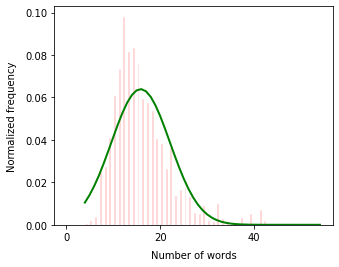

In [6]:
plot_normal_dist(list(df_bioasq7b["num_word_in_question"]), 50, "word_dist.png")

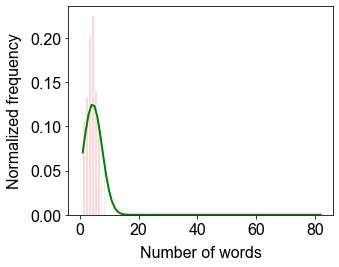

In [7]:
plot_normal_dist(list(df_bioasq7b["num_word_in_answer"]), 10, "answer_dist.png")

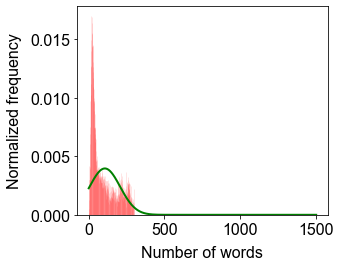

In [8]:
plot_normal_dist(list(df_bioasq7b["num_word_in_token"]), 300, "token_dist.png")